In [55]:
print(f"XGBoost Version: {xgb.__version__}")
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

XGBoost Version: 2.0.0


In [56]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [58]:
model = xgb.XGBRegressor(
    booster='gbtree',
    objective='reg:squarederror',
    eval_metric='rmse',
    learning_rate=0.01,
    max_depth=4,
    n_estimators=2000,
    verbosity=2,
    random_state=42)

In [59]:
model.fit(X_train, y_train, verbose=True,
          eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:1.14711	validation_1-rmse:1.14815
[1]	validation_0-rmse:1.14047	validation_1-rmse:1.14163
[2]	validation_0-rmse:1.13390	validation_1-rmse:1.13509
[3]	validation_0-rmse:1.12743	validation_1-rmse:1.12874
[4]	validation_0-rmse:1.12104	validation_1-rmse:1.12236
[5]	validation_0-rmse:1.11475	validation_1-rmse:1.11614
[6]	validation_0-rmse:1.10853	validation_1-rmse:1.10996
[7]	validation_0-rmse:1.10242	validation_1-rmse:1.10390
[8]	validation_0-rmse:1.09637	validation_1-rmse:1.09793
[9]	validation_0-rmse:1.09041	validation_1-rmse:1.09202
[10]	validation_0-rmse:1.08453	validation_1-rmse:1.08622
[11]	validation_0-rmse:1.07871	validation_1-rmse:1.08049
[12]	validation_0-rmse:1.07296	validation_1-rmse:1.07483
[13]	validation_0-rmse:1.06729	validation_1-rmse:1.06927
[14]	validation_0-rmse:1.06169	validation_1-rmse:1.06378
[15]	validation_0-rmse:1.05617	validation_1-rmse:1.05833
[16]	validation_0-rmse:1.05072	validation_1-rmse:1.05302
[17]	validation_0-rmse:1.04528	validation

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [63]:
results = model.evals_result()
results

{'validation_0': OrderedDict([('rmse',
               [1.1471103991061578,
                1.1404681246448134,
                1.1338953734771278,
                1.1274326618082287,
                1.1210367123427398,
                1.1147475313917978,
                1.108533748568721,
                1.102421391221788,
                1.0963733304829322,
                1.0904139364625178,
                1.0845294250083668,
                1.078710682338325,
                1.0729563003446323,
                1.0672908978198365,
                1.06169123507092,
                1.0561675526497325,
                1.050715618104213,
                1.0452826569828184,
                1.039979917979136,
                1.0346948840091077,
                1.0295413786143688,
                1.0243032282035542,
                1.0192499564864888,
                1.0141499045284765,
                1.0092503566691184,
                1.004292620681744,
                0.999516863553203

In [64]:
best_iter = model.best_iteration
best_iter

AttributeError: ignored

In [65]:
model.feature_importances_

array([0.55319244, 0.06400359, 0.0423504 , 0.01930119, 0.01456025,
       0.14759919, 0.07335285, 0.08564012], dtype=float32)

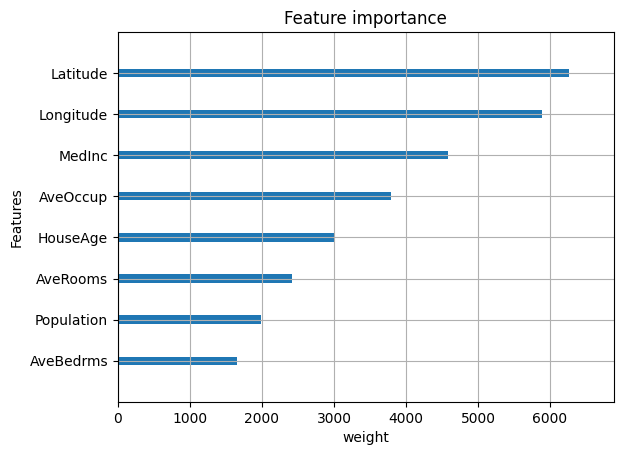

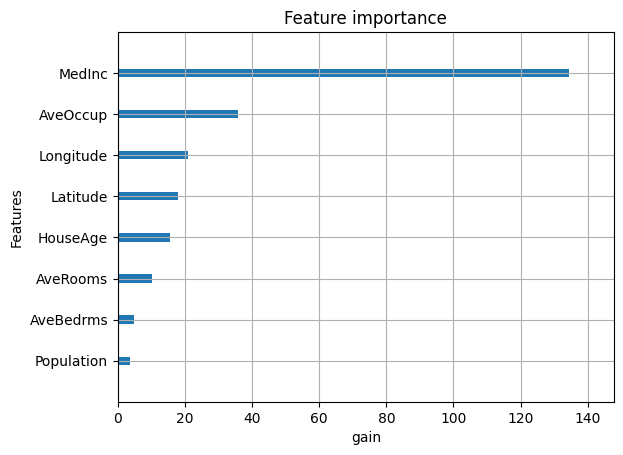

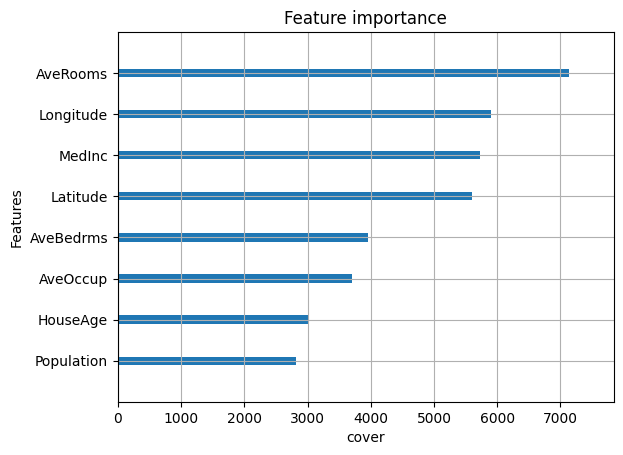

In [66]:
feat_importance = ["weight", "gain", "cover"]

for i in feat_importance:
    xgb.plot_importance(model,
                    importance_type=i,
                    show_values=False,
                    xlabel=i);

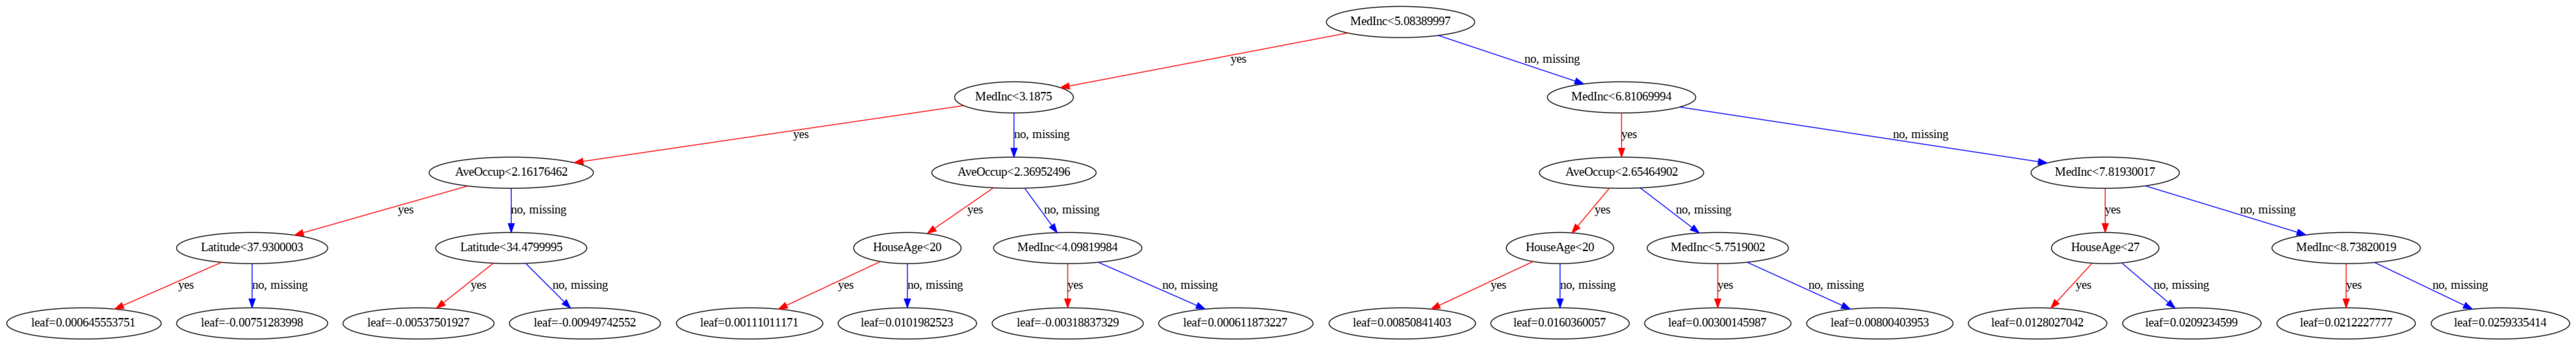

In [67]:
fig, ax = plt.subplots(figsize=(100,100))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

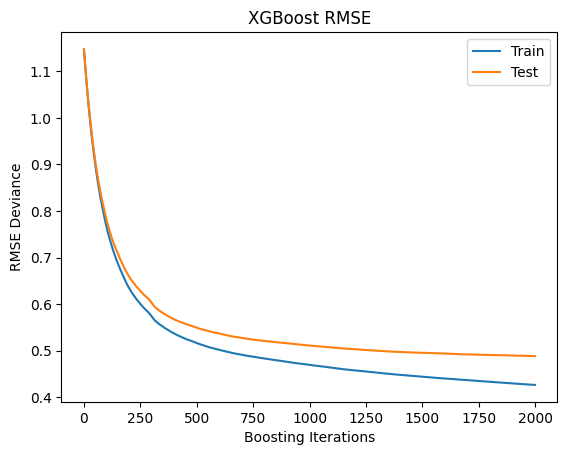

In [68]:
# Prepare x-axis
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");